In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 250

In [3]:
pwd

'/Users/keenanburkepitts/Documents/Data_Science/NYC_DSA/final_project/NYC-DSA-Bootcamp----Final-Project'

In [4]:
ls

Craigslist_items.json               fb_items_cleaned.csv
FBM_selenium.py                     fb_used_items_filtered.txt
Facebook_items.json                 final_project/
Letgo_items.json                    final_project_EDA_and_NLP.ipynb
README.md                           final_project_data_wrangling.ipynb
all_items_cleaned.csv               geckodriver.log
cl_items_cleaned.csv                lg_items_cleaned.csv
cl_used_items_filtered.txt          lg_used_items_filtered.txt
connxchange_FBM.py                  nlp_items_cleaned.csv


## EDA

In [5]:
fb_items_df = pd.read_csv('fb_items_cleaned.csv')
lg_items_df = pd.read_csv('lg_items_cleaned.csv')
cl_items_df = pd.read_csv('cl_items_cleaned.csv')
all_items_df = pd.read_csv('all_items_cleaned.csv')

In [6]:
all_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9855 entries, 0 to 9854
Data columns (total 7 columns):
Description    7050 non-null object
Latitude       7557 non-null float64
Location       9855 non-null object
Longitude      7557 non-null float64
Price          9845 non-null float64
Title          9855 non-null object
Url            9855 non-null object
dtypes: float64(3), object(4)
memory usage: 539.0+ KB


In [7]:
#checking to see how many missing values there are per column
null_columns = all_items_df.columns[all_items_df.isnull().any()]
all_items_df[null_columns].isnull().sum()

Description    2805
Latitude       2298
Longitude      2298
Price            10
dtype: int64

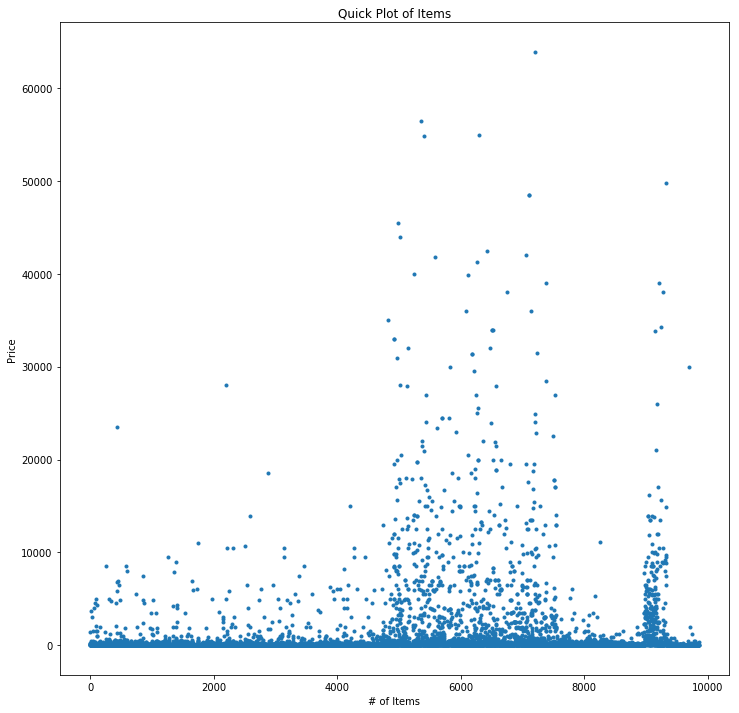

In [8]:
#quick plot to visualize price range of values
plt.figure(figsize=(12,12))
plt.plot(all_items_df.Price.values, '.')
plt.title("Quick Plot of Items")
plt.ylabel("Price")
plt.xlabel("# of Items")
plt.show();

In [9]:
#getting count of items by location
grouped_locations_count = all_items_df.groupby(['Location']).count()
grouped_locations_count.sort_values('Url', ascending=False).head(10)
# grouped_locations

,Description,Latitude,Longitude,Price,Title,Url
Location,,,,,,
"Asheville, NC",1907,2100,2100,2625,2628,2628
"Hendersonville, NC",794,841,841,1055,1055,1055
"Candler, NC",579,628,628,693,696,696
"Waynesville, NC",444,485,485,578,579,579
Unspecified,402,405,405,405,405,405
"Arden, NC",304,317,317,405,405,405
"Fletcher, NC",234,263,263,324,325,325
"Canton, NC",232,232,232,309,309,309
"Weaverville, NC",192,207,207,274,274,274


In [10]:
#groupby object to find total of item prices by location
grouped_locations_sum = all_items_df.groupby(['Location']).agg(['sum']).loc[:,'Price'].reset_index()
grouped_locations_sum.sort_values('sum', ascending=False).head(10)

,Location,sum
7,"Asheville, NC",1610373.7
169,Unspecified,1302259.0
79,"Hendersonville, NC",693584.0
109,"Marion, NC",332708.0
172,"Waynesville, NC",254122.0
173,"Weaverville, NC",235982.0
25,"Candler, NC",226872.0
18,"Brevard, NC",202099.0
22,"Burnsville, NC",200587.0
26,"Canton, NC",182789.0


## Indepth look at Free Items

In [11]:
free_items_df = all_items_df[all_items_df.Price == 0]

free_items_df.groupby(['Location']).size().sort_values(ascending=False)


Location
Asheville, NC         246
Hendersonville, NC     83
Candler, NC            56
Canton, NC             48
Waynesville, NC        30
Clyde, NC              21
Arden, NC              16
Weaverville, NC        14
Fairview, NC           13
Burnsville, NC         13
Brevard, NC            11
Maggie Valley, NC       9
Swannanoa, NC           9
Marion, NC              8
Black Mountain, NC      8
Marshall, NC            7
Fletcher, NC            7
Old Fort, NC            6
Leicester, NC           6
Forest City, NC         6
Mills River, NC         5
Spindale, NC            3
Barnardsville, NC       3
Spruce Pine, NC         3
Rutherfordton, NC       3
Erwin, TN               3
Pisgah Forest, NC       3
Flat Rock, NC           3
Mars Hill, NC           3
Alexander, NC           2
Dana, NC                1
East Flat Rock, NC      1
Saluda, NC              1
Lake Lure, NC           1
Bakersville, NC         1
Travelers Rest, SC      1
Union Mills, NC         1
dtype: int64

## Indepth look at Location Unspecified

In [12]:
#subsetting values with unknown location
unknown_location_df = all_items_df[all_items_df.Location == 'Unspecified']

unknown_location_df['Price'].describe()

count      405.000000
mean      3215.454321
std       6789.623670
min          1.000000
25%         50.000000
50%        225.000000
75%       3200.000000
max      63900.000000
Name: Price, dtype: float64

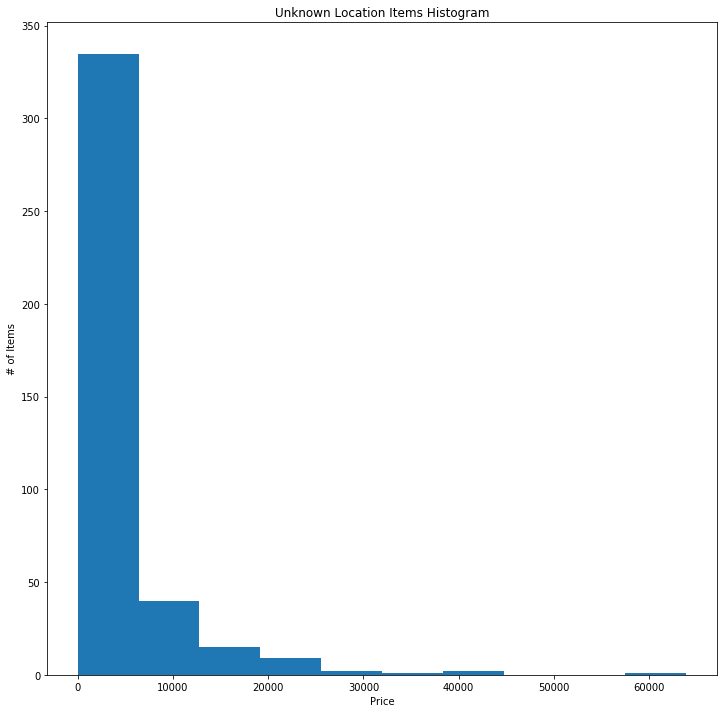

In [13]:
plt.figure(figsize=(12,12)) #opening a figure
plt.hist(unknown_location_df.Price.values)
plt.title("Unknown Location Items Histogram")
plt.ylabel("# of Items")
plt.xlabel("Price")
plt.show();

In [14]:
unknown_location_df.sort_values('Price', ascending=False).head(25)

,Description,Latitude,Location,Longitude,Price,Title,Url
7207,"1963 Chevy Impala SS 409 Convertible. Palomar Red,Auto, factory A/C, PS, PB, am/fm radio. Engine and Trans rebuilt, new front end, power disc front brakes auto trunk release...Runs and drives like new. ready for show and go. True SS Orig Arizona ...",35.577811,Unspecified,-82.582348,63900.0,1963 Chevy Impala SS 409 Convt,https://asheville.craigslist.org/cto/d/1963-chevy-impala-ss-409-convt/6513166566.html
5018,"2017 Ford Transit Wagon 350 HD XLT High Roof w/Extended Length that has been converted for a wheelchair. Family bought for my dad before he barely had a chance to use it. We bought it at 49,750 and the conversion was another 15,000 Any questions ...",35.586410,Unspecified,-82.556076,44000.0,2017 Ford Transit Wagon 350 HD XLT HANDICAP Converted,https://asheville.craigslist.org/cto/d/2017-ford-transit-wagon-350/6487265028.html
6269,"Solid worm wood antique dresser very good condition. Antique Mountain S wood burning cook stove, and heavy duty wrought Iron picnic table. Will take best reasonable cash offer.",35.617200,Unspecified,-82.407000,41265.0,"Dresser, Wood burning cook stove, and Wrought Iron picknic Table",https://asheville.craigslist.org/atq/d/dresser-wood-burning-cook/6512740520.html
4924,"We're a Christian family in the ministry in search of a house in the countryside so we can grow our own food. We're looking for a work/rent trade, specifically on a working farm. We have experience in raising chickens and gardening and have a hig...",34.835534,Unspecified,-82.124561,33000.0,*Christian Family Will Work Farm for Rent*,https://asheville.craigslist.org/wan/d/christian-family-will-work/6512059408.html
6184,"Thanks For Checking Us Out At Auto Motives! AUTOMOTIVESNC.COM We Use Over 15 banks and Credit Unions For the Lowest Rates Possible For All Types Of Credit! BAD CREDIT, NO CREDIT, REPOS NO PROBLEM! MONTHLY PAYMENTS TO FIT ANY INCOME! FINANCING FOR...",35.455888,Unspecified,-81.803856,31400.0,2007 Chevy Tahoe LT4WD*3RdRow*NoAccidents*Financing Available Cheap,https://asheville.craigslist.org/ctd/d/2007-chevy-tahoe/6512685922.html
6570,Selling a 2016 Jeep Wrangler Soft Top. It is a manual transmission and is stock from the factory except for a Wrangler specific trailer hitch installed. We are non smokers and don't have pets so the interior is nice and clean. The vehicle has nev...,35.549658,Unspecified,-82.656927,27900.0,"2016 Jeep Wrangler Sahara Great shape/17,000 miles",https://asheville.craigslist.org/cto/d/2016-jeep-wrangler-sahara/6506735468.html
6278,"Cummings engine, 95% tires good tight operating machine 25,500obo call 828 two eight four 0045",35.903000,Unspecified,-82.287600,25500.0,95 franklin skidder,https://asheville.craigslist.org/hvo/d/95-franklin-skidder/6512745685.html
5435,"1998 John Deere 5510 (89hp), 4wd w/ Front-End Loader. 2735hrs Asking $24k Call/Text",35.361300,Unspecified,-82.426400,24000.0,1998 John Deere 5510,https://asheville.craigslist.org/grd/d/1998-john-deere-5510/6512370519.html
5921,nice 2005 3500 setup to make money hauling campers or hotshot right now campers are starting to move and a good time to start making money. To many options to list. Wouldn't sell it but I have back problems and am not able to keep doing this. I w...,35.681900,Unspecified,-82.018000,23000.0,2005 dodge money maker,https://asheville.craigslist.org/cto/d/2005-dodge-money-maker/6492186007.html
6563,"2016 Honda Odyssey SE Special Edition (obsidian blue pearl exterior with gray interior) with 66,755 miles. Excellent condition non smoker with a clean title. Please feel free to call text or email anytime with any questions. Options: Back up came...",35.343200,Unspecified,-82.556500,21900.0,2016 Honda Odyssey SE Special Edition,https://asheville.craigslist.org/cto/d/2016-honda-odyssey-se-special/6512871314.html


count       98.000000
mean      7011.602041
std       3800.937157
min       2000.000000
25%       3800.000000
50%       6250.000000
75%       9875.000000
max      14999.000000
Name: Price, dtype: float64


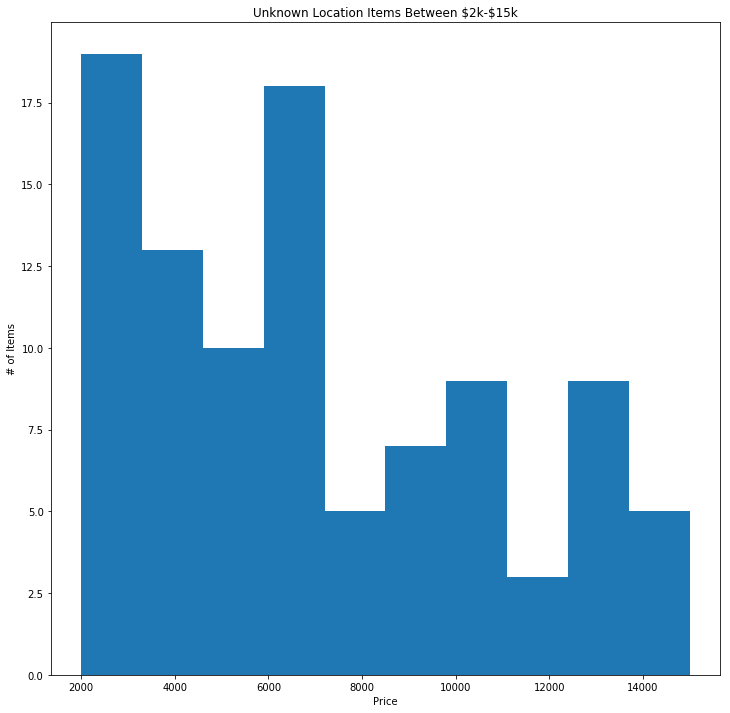

In [15]:
unknown_location_df_15to2k = unknown_location_df[(unknown_location_df['Price'] >= 2000) & (unknown_location_df['Price'] < 15000)]

print(unknown_location_df_15to2k['Price'].describe())

plt.figure(figsize=(12,12)) #opening a figure
plt.hist(unknown_location_df_15to2k.Price.values)
plt.title("Unknown Location Items Between \$2k-$15k")
plt.ylabel("# of Items")
plt.xlabel("Price")
plt.show();

In [16]:
unknown_location_df_15to2k.sort_values('Price', ascending=False)

,Description,Latitude,Location,Longitude,Price,Title,Url
6222,BUILT RIGHT- call MATT THERE IS A DIFFERENCE *RACE READY* --8.5x24 ALL ALUMINUM EDITION ENCLOSED CARGO TRAILER-- BLACKOUT ANY COLOR. Not your average trailer but still built with the same strength you are used TO SEEING FROM US. All aluminum body...,32.546000,Unspecified,-83.604700,14999.0,8.5x24 aluminum car hauler -RACE READY enclosed cargo trailer in stock,https://asheville.craigslist.org/for/d/85x24-aluminum-car-hauler/6512574021.html
5982,"Go www.T-Spring.com. The name of the shirt is ""Peace in Ireland """,35.449900,Unspecified,-82.496600,14999.0,St. Patrick's Day T-Shirt,https://asheville.craigslist.org/clo/d/st-patricks-day-shirt/6512601091.html
5981,"I have a 2006 lifted crew cab Powerstroke that I simply do not need. I love the truck as does everyone else who sees it. It looks great, runs great, and sounds great! I'm sure I'll forget something but here's my best attempt. On the outside: it h...",35.449900,Unspecified,-82.496600,14999.0,LIFTED DIESEL,https://asheville.craigslist.org/cto/d/lifted-diesel/6504276120.html
5985,"Ford explorer spor track 4x4 2007 85milles ,good condition, clean, like new obo call se abla español .",35.637400,Unspecified,-82.564600,14900.0,Ford explorer spor track,https://asheville.craigslist.org/cto/d/ford-explorer-spor-track/6512617427.html
5677,"2014 Jeep Grand Cherokee Fully Loaded 4x4, Leather Seats, Sunroof, New Tires and Custom Pioneer radio system 40K Miles V8 Engine Car Is In Perfect Shape I'm The Second Owner asking 14700 obo CommandView Dual-Pane Panoramic Sunroof, Remote Start S...",35.537600,Unspecified,-82.700100,14887.0,"Sunroof, 2014 Jeep Grand Cherokee Fully Loaded 4x4New Tires",https://asheville.craigslist.org/cto/d/sunroof-2014-jeep-grand/6512477337.html
7154,"Red and black 2016 Polaris RZR 900 S. Like new, and runs great! Low miles!! The only reason we are selling is because we don't have time to ride it anymore. $13,500 OBO if reasonable. I can send more pictures upon request. If you have any questio...",35.580800,Unspecified,-82.607800,13500.0,Polaris rzr 900 s,https://asheville.craigslist.org/snw/d/polaris-rzr-900/6513152843.html
7115,"Very nice 4630 8 speed. Dual hydraulics, good tires, 2600 hrs, and joy stick control for loader. I'm the second owner. Starts and runs great. Hay spear with the loader. $13,500 obo.",35.317200,Unspecified,-82.597700,13500.0,92 4630,https://asheville.craigslist.org/grd/6513132866.html
7135,"Clean 93 5030. Runs very well, with dual hydraulics, joy stick control, canopy, good tires, and 3400 hrs. Has a new radiator. Asking $13,500 obo",35.300836,Unspecified,-82.455654,13500.0,93 5030 with loader,https://asheville.craigslist.org/grd/d/with-loader/6513142397.html
6327,"88 Toyota Sr5- Selling at 13250. It runs great, has got a clean history, it's been checked for emission. Clocking only 47XXX ofmileage, and a powerful 8 cyl motor. Has been run on full synthetic oil. red, I really took care of this car from the t...",35.637400,Unspecified,-82.564600,13250.0,"Inspected,Pristine 1988 Toyota Sr5",https://asheville.craigslist.org/cto/d/inspectedpristine-1988-toyota/6512712455.html
6738,"I made the decision to sell my car. Price is $12600. With a very low mileage of 29X00 miles. I have many awesome memories with it but I'm hoping to purchase a new vehicle. This was given to me as a gift, and I've only ever driven this one. All re...",35.325000,Unspecified,-81.846000,12600.0,'14 Mini Cooper unblemished record,https://asheville.craigslist.org/cto/d/14-mini-cooper-unblemished/6512976334.html


count     286.000000
mean      272.188811
std       407.589163
min         1.000000
25%        30.000000
50%       100.000000
75%       300.000000
max      1969.000000
Name: Price, dtype: float64


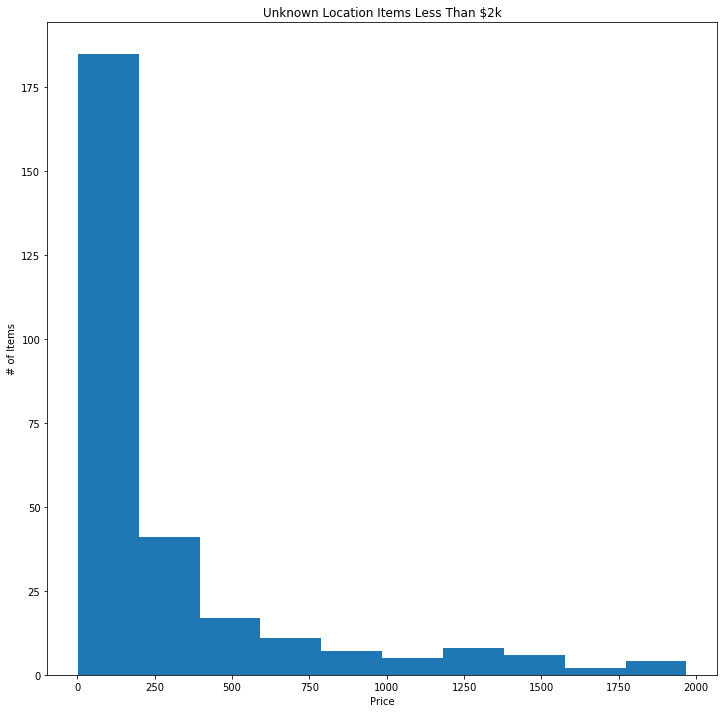

In [17]:
unknown_location_df_lt2k = unknown_location_df[unknown_location_df['Price'] < 2000]

print(unknown_location_df_lt2k['Price'].describe())

plt.figure(figsize=(12,12)) #opening a figure
plt.hist(unknown_location_df_lt2k.Price.values)
plt.title("Unknown Location Items Less Than \$2k")
plt.ylabel("# of Items")
plt.xlabel("Price")
plt.show();

In [18]:
print(len(unknown_location_df_lt2k.sort_values('Price')))
print('\n')
unknown_location_df_lt2k.sort_values('Price')

286




,Description,Latitude,Location,Longitude,Price,Title,Url
5427,"WANTED CASH PAID FOR ANTIQUES AND COLLECTABLES ADVERTISING AUTOMOTIVE signs, oil cans, (gas,food,soda,ETC.) oil lubsters/pumps clocks gas pumps, porcelain lights, candy jars, air pumps,water cans, thermometers, old gas station items road maps, ol...",35.537600,Unspecified,-82.700100,1.0,"WANTING BLUE BALL JARS,OLD COMIC BOOKS,TOBACCO BASKETS, SIGNS,OIL CAN",https://asheville.craigslist.org/atq/d/wanting-blue-ball-jarsold/6493535011.html
5466,"I have an excellent almost pristine eddie Bauer ford expedition for sale. Has brand new tires,new radiator, alternator been replaced along with many other services. I have a folder worth every receipt.car is registered until July 2018. I just got...",35.600400,Unspecified,-82.491800,1.0,ford expedition size: full-size,https://asheville.craigslist.org/cto/d/ford-expedition-size-full-size/6512397435.html
7530,"Square body interior truck parts . Have one right hand door panel that is in excellent shape . Instrument panel bezel, dash molding . All of these are nice original GM parts.",35.617200,Unspecified,-82.407000,1.0,1973-1979 Chevy Truck parts,https://asheville.craigslist.org/pts/d/chevy-truck-parts/6513304576.html
6489,2002 chevy 18x12 wheels 35 inch tires K&N intake 205k Trade for other trucks,36.274400,Unspecified,-86.829200,1.0,2002 chevy Silverado TRADE,https://asheville.craigslist.org/cto/d/2002-chevy-silverado-trade/6512846313.html
6737,"MAB Sandblasting offers a complete mobile Sandblasting service at reasonable rates. Let us help you with your restoration projects. Sandblasting can remove years of grease, grime, paint and rust. We have blasted everything from brick buildings to...",35.325000,Unspecified,-81.846000,1.0,MAB Sandblasting and more,https://asheville.craigslist.org/cto/d/mab-sandblasting-and-more/6512980720.html
7059,Selling my 2010 Ford explorer eddie bauer edition fully loaded.Text me at:🔥 clara825h&commat;gmail.com 🔥,35.623700,Unspecified,-82.667100,2.0,2010 Ford Explorer Eddie Bauer Running Boards,https://asheville.craigslist.org/cto/d/2010-ford-explorer-eddie/6513111813.html
6488,This is just a partial list of everything that is for sale! APW FOOD WARMER FWE HEAT N HOLD CARLISLE BEVERAGE DISPENSER BOOTHS VULCAN GAS 2 BURNER RANGE CHAIRS STAINLESS STEEL TABLES CATERING EQUIPMENT SOUTHERN PRIDE ROTISSERIE SMOKER BARMAID ELE...,36.274400,Unspecified,-86.829200,3.0,Restaurant Equipment - Smokey Pig,https://asheville.craigslist.org/had/d/restaurant-equipment-smokey/6512838991.html
6085,Orchard Grass/Fescue mix. Horse quality. Stored in dry barn. 2nd and 3rd cutting. $5.00 a bale. Call or text,35.617200,Unspecified,-82.407000,4.0,Square Bale Hay,https://asheville.craigslist.org/grd/d/square-bale-hay/6480774542.html
6086,"I have a good variety of riding crops and whips for sale. Different lenghts, styles, prices and different uses.",35.617200,Unspecified,-82.407000,4.0,Riding Crops and Whips,https://asheville.craigslist.org/for/d/riding-crops-and-whips/6505306428.html
6087,"New, ""horsey"" signs. Fergus the horse signs $9.00 each. Others Very reasonably priced.",35.617200,Unspecified,-82.407000,4.0,"New ""Horsey"" Signs",https://asheville.craigslist.org/for/d/new-horsey-signs/6505288926.html


### locations with 10 items or less

In [19]:
locations_less_than_ten_items = all_items_df.groupby(['Location']).filter(lambda g: g.Location.value_counts() < 10) \
.loc[:,['Location','Description', 'Price', 'Title', 'Url']]


#checking the number of locations with less than 10 items
len_of_locs = len(locations_less_than_ten_items.groupby("Location").size())
print(f'There are {len_of_locs} cities with less than 10 items.')
print('\n')

#checking the locations with the most items in this subset
print('Locations with the most amount of items in this subset:')
print(locations_less_than_ten_items.groupby(['Location']).size().sort_values(ascending=False).head(10))
print('\n')

#sorting locations by largest total selling price  
print('Locations with highest total selling price:')
print(locations_less_than_ten_items.groupby(['Location']).agg(['sum']).loc[:,'Price'].sort_values('sum', ascending=False).head(10))
print('\n')

#sorting locations by largest average selling price totals 
print('Locations with highest average selling price:')
print(locations_less_than_ten_items.groupby(['Location']).mean().sort_values(by='Price',ascending=False).head(10))

There are 126 cities with less than 10 items.


Locations with the most amount of items in this subset:
Location
Chesnee, SC         9
Murphy, NC          9
Lake Toxaway, NC    9
Bostic, NC          9
Hickory, NC         9
Gaffney, SC         8
Whittier, NC        8
Oakley, NC          8
Inman, SC           8
Reynolds, NC        7
dtype: int64


Locations with highest total selling price:
                         sum
Location                    
Hickory, NC          66800.0
Chesnee, SC          64061.0
Inman, SC            59492.0
Tazewell, TN         57875.0
Clayton, GA          54900.0
Sevierville, TN      49925.0
Boiling Springs, SC  46950.0
Murphy, NC           46325.0
Newland, NC          43300.0
Easley, SC           41800.0


Locations with highest average selling price:
                    Price
Location                 
Clayton, GA       54900.0
Easley, SC        41800.0
Benson, NC        34000.0
Tazewell, TN      28937.5
Chadbourn, NC     28000.0
Yadkinville, NC   24500.0
Harm

### locations with 10 items or more.  

In [20]:
locations_ten_or_more = all_items_df.groupby(['Location']).filter(lambda g: g.Location.value_counts() >= 10) \
.loc[:,['Location','Description', 'Price', 'Title', 'Url']]

#checking the number of locations with less than 10 items
len_of_locs = len(locations_ten_or_more.groupby("Location").size())
print(f'There are {len_of_locs} cities with 10 items or more.')
print('\n')

#checking the locations with the most items in this subset
print('Locations with the most amount of items in this subset:')
print(locations_ten_or_more.groupby(['Location']).size().sort_values(ascending=False).head(11))
print('\n')

#sorting locations by largest total selling price  
print('Locations with highest total selling price:')
print(locations_ten_or_more.groupby(['Location']).agg(['sum']).loc[:,'Price'].sort_values('sum', ascending=False).head(10))
print('\n')

#sorting locations by largest average selling price totals 
print('Locations with highest average selling price:')
print(locations_ten_or_more.groupby(['Location']).mean().sort_values(by='Price',ascending=False).head(11))

There are 53 cities with 10 items or more.


Locations with the most amount of items in this subset:
Location
Asheville, NC         2628
Hendersonville, NC    1055
Candler, NC            696
Waynesville, NC        579
Unspecified            405
Arden, NC              405
Fletcher, NC           325
Canton, NC             309
Weaverville, NC        274
Marion, NC             231
Leicester, NC          199
dtype: int64


Locations with highest total selling price:
                          sum
Location                     
Asheville, NC       1610373.7
Unspecified         1302259.0
Hendersonville, NC   693584.0
Marion, NC           332708.0
Waynesville, NC      254122.0
Weaverville, NC      235982.0
Candler, NC          226872.0
Brevard, NC          202099.0
Burnsville, NC       200587.0
Canton, NC           182789.0


Locations with highest average selling price:
                        Price
Location                     
Pineville, NC    11872.933333
Spartanburg, SC   8514.312500
Greenv

## NLP

In [85]:
#subset only items with Descriptions, Prices, and Titles.
nlp_df = all_items_df.dropna(subset = ['Description', 'Price', 'Title'])
nlp_df = nlp_df[nlp_df.Description != 'None'].reset_index()
nlp_df.drop(['index'], axis = 1, inplace = True)

#combine Title and Price, and Description columns
nlp_df['Information'] = nlp_df.iloc[:,5] + '. ' + '$' + nlp_df.iloc[:,4].astype(str) + '. ' + nlp_df.iloc[:,0] 

#sample that subset
nlp_df.sample(10)

,Description,Latitude,Location,Longitude,Price,Title,Url,Information
5337,Fresh organic extra large eggs 4.00 a dozen or...,35.637400,"Asheville, NC",-82.564600,4.0,Fresh organic extra large eggs,https://asheville.craigslist.org/grd/d/fresh-o...,Fresh organic extra large eggs. $4.0. Fresh or...
2367,Price negotiable just need it gone today,35.524554,"Candler, NC",-82.709931,20.0,Call of duty advance warfare ps4,https://us.letgo.com/en/i/Call-of-duty-advance...,Call of duty advance warfare ps4. $20.0. Price...
852,Never used just took out the bag to take pictu...,35.662520,"Leicester, NC",-82.689018,20.0,Changing table on the go!,https://us.letgo.com/en/i/Changing-table-on-th...,Changing table on the go!. $20.0. Never used j...
1384,This cage put it together and it's brand-new I...,35.598124,"Swannanoa, NC",-82.428126,100.0,Small animal or bird 3tier deluxe cage,https://us.letgo.com/en/i/Small-animal-or-bird...,Small animal or bird 3tier deluxe cage. $100.0...
54,This is a super clean car inside and out. Has ...,35.595849,"Asheville, NC",-82.554835,5000.0,Mercedes - sport - 2006,https://us.letgo.com/en/i/Mercedes-sport-2006_...,Mercedes - sport - 2006. $5000.0. This is a su...
36,‘01 with low miles (83000) Great running car a...,35.509991,"Maggie Valley, NC",-83.066348,4000.0,red Ford Mustang convertible coupe,https://us.letgo.com/en/i/red-Ford-Mustang-con...,red Ford Mustang convertible coupe. $4000.0. ‘...
3769,Have all four power lock doors for 2001 to 200...,35.537600,"Candler, NC",-82.700100,100.0,All doors for 2001 to 2003 Chrysler Town & Cou...,https://asheville.craigslist.org/pts/d/all-doo...,All doors for 2001 to 2003 Chrysler Town & Cou...
577,Lightly used futon in very good condition. Ori...,35.714840,"Weaverville, NC",-82.548627,100.0,Brown wooden framed futon,https://us.letgo.com/en/i/Brown-wooden-framed-...,Brown wooden framed futon. $100.0. Lightly use...
4879,Beautiful Solid wood all in one Chicken Coop a...,35.100775,"Turtletown, TN",-84.373283,2000.0,New $300 off reg price. 5.5' x 12' x 7' mini C...,https://asheville.craigslist.org/grd/d/new-300...,New $300 off reg price. 5.5' x 12' x 7' mini C...
2692,"Mercedes Benz S500 2005 year, very good condit...",35.585609,"Asheville, NC",-82.633622,5900.0,Mercedes - S - 2005,https://us.letgo.com/en/i/Mercedes-S-2005_ec17...,Mercedes - S - 2005. $5900.0. Mercedes Benz S5...


In [124]:
nlp_df.to_csv('nlp_items_cleaned.csv', index=False)

In [141]:
#create a sample subset of 95 items.
# nlp_df_sample = nlp_df.sample(95)
list(nlp_df_sample.iloc[:,7])

['2 New 64GB Micro-SD cards. $25.0. 2 brand new high performance micro-sd cards with sd card adapters. Will sell separately',
 "UA Coldwear Infrared Hoodie Size YLG. $25.0. This softshell delivers amazing style and even more amazing warmth thanks to ColdGear® Infrared. You see that pattern inside? It's actually a soft ceramic coating that absorbs your body heat and holds onto it - keeping you warmer, longer. Perfect for hitting the hill or just heading out when it's seriously cold. •Slick bonded fleece exterior with windproof laminate. •Internal ceramic coating that seeks, absorbs, and retains body heat to keep you warmer, longer. •Soft, brushed interior locks in heat for all-day warmth and comfort. •Highly water-resistant UA Storm technology repels rain and snow for all-weather wear. •Lightweight, 4-Way Stretch construction improves mobility and maintains shape. •UA MagZip magnetic quick zip for extra easy on/off. •Secure hand pockets and internal audio pocket. ***Preowned and in EXCE

In [142]:
#execute Summary Extractor model 
ml = MonkeyLearn('insert api key here')
data = list(nlp_df_sample.iloc[:,7])
model_id = 'ex_94WD2XxD'
# summary_model_results = ml.extractors.extract(model_id, data, production_model=True)
print(summary_model_results.body)

[{'text': '2 New 64GB Micro-SD cards. $25.0. 2 brand new high performance micro-sd cards with sd card adapters. Will sell separately', 'external_id': None, 'error': False, 'extractions': [{'tag_name': 'SUMMARY', 'parsed_value': '2 New 64GB Micro-SD cards. $25.0. 2 brand new high performance micro-sd cards with sd card adapters. Will sell separately'}]}, {'text': "UA Coldwear Infrared Hoodie Size YLG. $25.0. This softshell delivers amazing style and even more amazing warmth thanks to ColdGear® Infrared. You see that pattern inside? It's actually a soft ceramic coating that absorbs your body heat and holds onto it - keeping you warmer, longer. Perfect for hitting the hill or just heading out when it's seriously cold. •Slick bonded fleece exterior with windproof laminate. •Internal ceramic coating that seeks, absorbs, and retains body heat to keep you warmer, longer. •Soft, brushed interior locks in heat for all-day warmth and comfort. •Highly water-resistant UA Storm technology repels ra

In [155]:
sample_summaries = [item.get('extractions')[0].get('parsed_value') for item in summary_model_results.body]

In [156]:
nlp_df_sample['Summary_Model_Results'] = sample_summaries 
nlp_df_sample.head()

,Description,Latitude,Location,Longitude,Price,Title,Url,Information,Summary_Model_Results
1734,2 brand new high performance micro-sd cards wi...,35.560469,"Asheville, NC",-82.636244,25.0,2 New 64GB Micro-SD cards,https://us.letgo.com/en/i/2-New-64GB-Micro-SD-...,2 New 64GB Micro-SD cards. $25.0. 2 brand new ...,2 New 64GB Micro-SD cards. $25.0. 2 brand new ...
124,This softshell delivers amazing style and even...,35.303505,"Hendersonville, NC",-82.442837,25.0,UA Coldwear Infrared Hoodie Size YLG,https://us.letgo.com/en/i/UA-Coldwear-Infrared...,UA Coldwear Infrared Hoodie Size YLG. $25.0. T...,It's actually a soft ceramic coating that abso...
4328,"Custom build Transition Rapture, Large 58cm fr...",35.020700,"Asheville, NC",-84.374800,1900.0,Transition Rapture CX Road Bike 58cm 700c Enve...,https://asheville.craigslist.org/bik/d/transit...,Transition Rapture CX Road Bike 58cm 700c Enve...,Thanks Transition Rapture LG ENVE CX Fork Nova...
78,Includes everything pictured $30,35.311301,"Hendersonville, NC",-82.464164,30.0,Huge Barbie lot,https://us.letgo.com/en/i/Huge-Barbie-lot-_220...,Huge Barbie lot. $30.0. Includes everything pi...,Huge Barbie lot. $30.0. Includes everything pi...
2581,Mint condition,35.487643,"Waynesville, NC",-82.940913,12.0,Haeger bowl,https://us.letgo.com/en/i/Haeger-bowl_99935b65...,Haeger bowl. $12.0. Mint condition,Haeger bowl. $12.0. Mint condition


In [157]:
#execute Price Extractor model 

data = list(nlp_df_sample.iloc[:,7])
model_id = 'ex_wNDME4vE'
# price_model_results = ml.extractors.extract(model_id, data, production_model=True)
print(price_model_results.body)

[{'text': '2 New 64GB Micro-SD cards. $25.0. 2 brand new high performance micro-sd cards with sd card adapters. Will sell separately', 'external_id': None, 'error': False, 'extractions': [{'tag_name': 'PRICE', 'extracted_text': '$25.0', 'parsed_value': '$ 25.00', 'offset_span': [27, 31], 'extractions': [{'tag_name': 'CURRENCY', 'extracted_text': '$', 'parsed_value': '$', 'offset_span': [27, 27]}, {'tag_name': 'AMOUNT', 'extracted_text': '25.0', 'parsed_value': 25.0, 'offset_span': [28, 31]}]}]}, {'text': "UA Coldwear Infrared Hoodie Size YLG. $25.0. This softshell delivers amazing style and even more amazing warmth thanks to ColdGear® Infrared. You see that pattern inside? It's actually a soft ceramic coating that absorbs your body heat and holds onto it - keeping you warmer, longer. Perfect for hitting the hill or just heading out when it's seriously cold. •Slick bonded fleece exterior with windproof laminate. •Internal ceramic coating that seeks, absorbs, and retains body heat to kee

In [177]:
price_summaries = [item.get('extractions')[0].get('parsed_value') for item in price_model_results.body]

In [183]:
nlp_df_sample['Price_Summary_Model_Results'] = price_summaries 
nlp_df_sample.head()

,Description,Latitude,Location,Longitude,Price,Title,Url,Information,Summary_Model_Results,Price_Summary_Model_Results
1734,2 brand new high performance micro-sd cards wi...,35.560469,"Asheville, NC",-82.636244,25.0,2 New 64GB Micro-SD cards,https://us.letgo.com/en/i/2-New-64GB-Micro-SD-...,2 New 64GB Micro-SD cards. $25.0. 2 brand new ...,2 New 64GB Micro-SD cards. $25.0. 2 brand new ...,$ 25.00
124,This softshell delivers amazing style and even...,35.303505,"Hendersonville, NC",-82.442837,25.0,UA Coldwear Infrared Hoodie Size YLG,https://us.letgo.com/en/i/UA-Coldwear-Infrared...,UA Coldwear Infrared Hoodie Size YLG. $25.0. T...,It's actually a soft ceramic coating that abso...,$ 25.00
4328,"Custom build Transition Rapture, Large 58cm fr...",35.020700,"Asheville, NC",-84.374800,1900.0,Transition Rapture CX Road Bike 58cm 700c Enve...,https://asheville.craigslist.org/bik/d/transit...,Transition Rapture CX Road Bike 58cm 700c Enve...,Thanks Transition Rapture LG ENVE CX Fork Nova...,$ 1900.00
78,Includes everything pictured $30,35.311301,"Hendersonville, NC",-82.464164,30.0,Huge Barbie lot,https://us.letgo.com/en/i/Huge-Barbie-lot-_220...,Huge Barbie lot. $30.0. Includes everything pi...,Huge Barbie lot. $30.0. Includes everything pi...,$ 30.00
2581,Mint condition,35.487643,"Waynesville, NC",-82.940913,12.0,Haeger bowl,https://us.letgo.com/en/i/Haeger-bowl_99935b65...,Haeger bowl. $12.0. Mint condition,Haeger bowl. $12.0. Mint condition,$ 12.00


In [185]:
#execute Used Item Classifier model
data = list(nlp_df_sample.iloc[:,7])
model_id = 'cl_y9SLBdtB'
# used_item_classifier_results = ml.classifiers.classify(model_id, data)
print(used_item_classifier_results.body)

[{'text': '2 New 64GB Micro-SD cards. $25.0. 2 brand new high performance micro-sd cards with sd card adapters. Will sell separately', 'external_id': None, 'error': False, 'classifications': [{'tag_name': 'Hobbies', 'tag_id': 55169700, 'confidence': 0.197}]}, {'text': "UA Coldwear Infrared Hoodie Size YLG. $25.0. This softshell delivers amazing style and even more amazing warmth thanks to ColdGear® Infrared. You see that pattern inside? It's actually a soft ceramic coating that absorbs your body heat and holds onto it - keeping you warmer, longer. Perfect for hitting the hill or just heading out when it's seriously cold. •Slick bonded fleece exterior with windproof laminate. •Internal ceramic coating that seeks, absorbs, and retains body heat to keep you warmer, longer. •Soft, brushed interior locks in heat for all-day warmth and comfort. •Highly water-resistant UA Storm technology repels rain and snow for all-weather wear. •Lightweight, 4-Way Stretch construction improves mobility and

In [199]:
item_category_predictions = [item.get('classifications')[0].get('tag_name') for item in used_item_classifier_results.body]

In [200]:
nlp_df_sample['Item_Category_Model_Results'] = item_category_predictions 
nlp_df_sample.head()

,Description,Latitude,Location,Longitude,Price,Title,Url,Information,Summary_Model_Results,Price_Summary_Model_Results,Item_Category_Model_Results
1734,2 brand new high performance micro-sd cards wi...,35.560469,"Asheville, NC",-82.636244,25.0,2 New 64GB Micro-SD cards,https://us.letgo.com/en/i/2-New-64GB-Micro-SD-...,2 New 64GB Micro-SD cards. $25.0. 2 brand new ...,2 New 64GB Micro-SD cards. $25.0. 2 brand new ...,$ 25.00,Hobbies
124,This softshell delivers amazing style and even...,35.303505,"Hendersonville, NC",-82.442837,25.0,UA Coldwear Infrared Hoodie Size YLG,https://us.letgo.com/en/i/UA-Coldwear-Infrared...,UA Coldwear Infrared Hoodie Size YLG. $25.0. T...,It's actually a soft ceramic coating that abso...,$ 25.00,Clothing & Accessories
4328,"Custom build Transition Rapture, Large 58cm fr...",35.020700,"Asheville, NC",-84.374800,1900.0,Transition Rapture CX Road Bike 58cm 700c Enve...,https://asheville.craigslist.org/bik/d/transit...,Transition Rapture CX Road Bike 58cm 700c Enve...,Thanks Transition Rapture LG ENVE CX Fork Nova...,$ 1900.00,Home & Garden
78,Includes everything pictured $30,35.311301,"Hendersonville, NC",-82.464164,30.0,Huge Barbie lot,https://us.letgo.com/en/i/Huge-Barbie-lot-_220...,Huge Barbie lot. $30.0. Includes everything pi...,Huge Barbie lot. $30.0. Includes everything pi...,$ 30.00,Vehicles
2581,Mint condition,35.487643,"Waynesville, NC",-82.940913,12.0,Haeger bowl,https://us.letgo.com/en/i/Haeger-bowl_99935b65...,Haeger bowl. $12.0. Mint condition,Haeger bowl. $12.0. Mint condition,$ 12.00,Clothing & Accessories


In [1]:
nlp_df_sample.head(10)

NameError: name 'nlp_df_sample' is not defined